In [3]:
from Tools import *
from photoObject import *
import numpy as np
import seaborn as sns
import pandas as pd
from BayesianInference import *
from random import Random
import random
from scipy.interpolate import interp1d

## Load Data

In [5]:
cat=ReadCatalogs("../../../A-Catalogs/Binospec-Candels.cat")
Photometry = [PhotoObject(c) for c in cat ]
filterNames     =   ['KPNO_U_FLUX', 'LBC_U_FLUX', 'ACS_F435W_FLUX', 'ACS_F606W_FLUX', 'ACS_F775W_FLUX', 'ACS_F814W_FLUX', 'ACS_F850LP_FLUX', 'WFC3_F105W_FLUX', 'WFC3_F125W_FLUX', 'WFC3_F140W_FLUX', 'WFC3_F160W_FLUX']
filtErrNames    =   [ 'KPNO_U_FLUXERR', 'LBC_U_FLUXERR', 'ACS_F435W_FLUXERR', 'ACS_F606W_FLUXERR', 'ACS_F775W_FLUXERR', 'ACS_F814W_FLUXERR', 'ACS_F850LP_FLUXERR', 'WFC3_F105W_FLUXERR', 'WFC3_F125W_FLUXERR', 'WFC3_F140W_FLUXERR', 'WFC3_F160W_FLUXERR']
centralWavelengths  = [3584.07,3579.29,4356.59,6000.37,7702.41,8196.29,9193.55,10651.00,12576.18,14061.91,15436.30]
EffectiveWidth      = [592.73,479.17,776.58,1871.31,1299.92,1933.96,1549.7,2371.97,2674.40,3569.86,2750.15]
maskLAE         = np.array([True if p.type=="LAE"  else False for p in Photometry])
UselessVariable = [gal.setFilters(filterNames,filtErrNames) for gal in Photometry]
UselessVariable = [gal.setCWave(centralWavelengths) for gal in Photometry]
UselessVariable = [gal.setEffWidth(EffectiveWidth) for gal in Photometry]





slopes  =  np.array([p.giveCat()["slope"] for p in Photometry]) #np.array([p.calculateUVslope(ShowPlots=False) for p in Photometry])
Muv     =   np.array([p.giveCat()["Muv"] for p in Photometry])#np.array([p.calculateMUV() for p in Photometry])
dMuv  =  np.array([p.giveCat()["dMuv"] for p in Photometry]) #np.array([p.MuvErr for p in Photometry])
zs  =   np.array([p.redshift for p in Photometry])
FWHM    =   np.array([p.giveCat()["LyaFWHM"] for p in Photometry])
LyaLum  =   np.array([p.calculateLumLya() for p in Photometry])
Skewness    =   np.array([p.giveCat()["Skewness"] for p in Photometry])
EW      = np.array([p.giveCat()["EWLya"] for p in Photometry])  #np.array([p.calculateEW() for p in Photometry])
dEW=np.array([p.giveCat()["dEWLya"] for p in Photometry])#np.array([p.getEWError() for p in Photometry])
dSlp=np.array([p.giveCat()["dslope"] for p in Photometry])#np.array([p.UVfitErrs[0] for p in Photometry])
dMuv=np.array([p.giveCat()["dMuv"] for p in Photometry])#np.array([p.MuvErr for p in Photometry])



In [25]:
c=ReadCatalogs("../../../A-Catalogs/Binospec-Candels_Nov1_backup.cat")

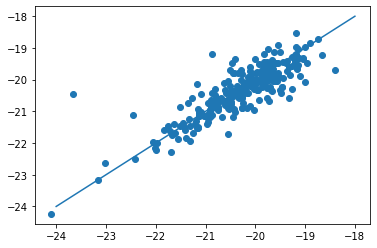

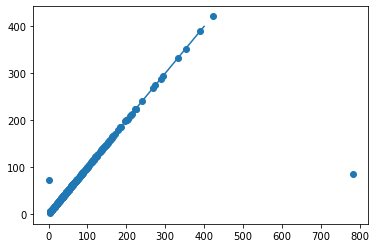

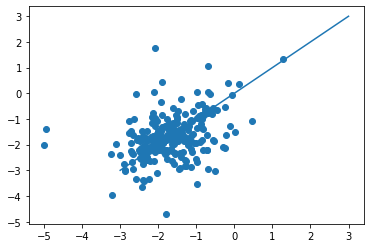

In [33]:
plt.scatter(muv,c["Muv"])
plt.plot([-24,-18],[-24,-18])
plt.show()
plt.scatter(ew,c["EWLya"])
plt.plot([0,400],[0,400])
plt.show()
plt.scatter(slopes,c["slope"])
plt.plot([-3,3],[-3,3])
plt.show()

In [34]:
slp=np.array([p.calculateUVslope(ShowPlots=False) for p in Photometry])
muv=np.array([p.calculateMUV() for p in Photometry])
ew=np.array([p.calculateEW() for p in Photometry])

cat["EWLya"]=ew
ascii.write(cat,"../../../A-Catalogs/Binospec-Candels.cat",overwrite=True)

/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/A-Project/D-EWModel/EWLya model/RealData/Tools.py:264: RuntimeWarning: invalid value encountered in log10
  logFerr=np.median([np.log10(fluxes-fluxesErr)-np.log10(fluxes),np.log10(fluxes)-np.log10(fluxes+fluxesErr)],axis=0)


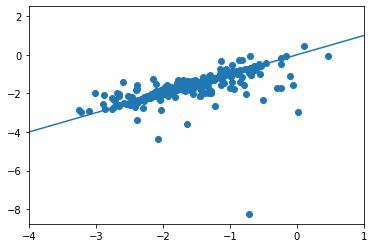

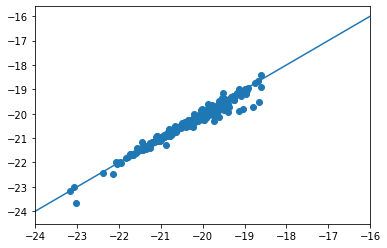

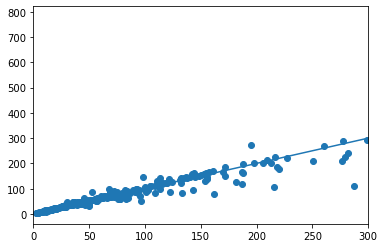

In [19]:
plt.scatter(cat["slope"],slp)
plt.plot([-4,2],[-4,2])
plt.xlim(-4,1)
plt.show()
plt.scatter(cat["Muv"],muv)
plt.plot([-24,-16],[-24,-16])
plt.xlim(-24,-16)
plt.show()
plt.scatter(cat["EWLya"],ew)
plt.plot([0,300],[0,300])
plt.xlim(0,300)
plt.show()

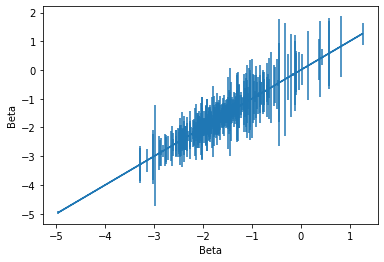

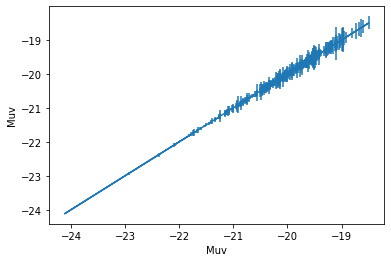

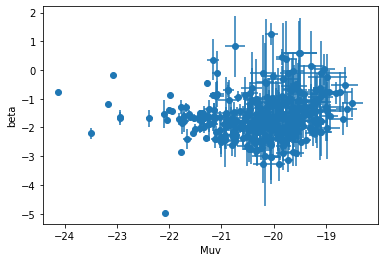

In [3]:
plt.errorbar(slopes,slopes,yerr=dSlp)
plt.xlabel("Beta")
plt.ylabel("Beta")
plt.show()

plt.errorbar(Muv,Muv,yerr=dMuv)
plt.xlabel("Muv")
plt.ylabel("Muv")
plt.show()

plt.errorbar(Muv,slopes,yerr=dSlp,xerr=dMuv,ls=" ",marker="o")
plt.xlabel("Muv")
plt.ylabel("beta")
plt.show()

In [12]:
def duplicate(data):
    return np.concatenate((data,data))

mask=[]
# Objects with all the individual data
for s,m,e in zip(slopes,Muv,EW):
    if -3.<s<0 and -22<m<-18 and np.isnan(e)==False and e<1000.:
    #if m<-18 and np.isnan(e)==False:
        mask.append(True)
    else:
        mask.append(False)


BGal = np.array([BayesGalaxy(c) for c in cat ])
for i in range(0,len(BGal)):
    BGal[i].Lum    =   LyaLum[i]
    BGal[i].zs    =   zs[i]
    BGal[i].EW    =   EW[i]
    BGal[i].dEW    =   dEW[i]
    BGal[i].UVslope    =   slopes[i]
    BGal[i].Muv    =   Muv[i]
    BGal[i].FWHM    =   FWHM[i]
    BGal[i].Skew    =   Skewness[i]
    BGal[i].dMuv    =   dMuv[i]
    BGal[i].dSlp    =   dSlp[i]


#BGal=duplicate(BGal)
#mask=duplicate(mask)

#BGal=duplicate(BGal)
#mask=duplicate(mask)



#Object with the global data inside

BInf=BayesInf()
BInf.types  =   [g.type for g in BGal[mask]]
BInf.Lum    =   np.array([g.Lum for g in BGal[mask]])
BInf.EW_obs    =   np.array([g.EW for g in BGal[mask]])
BInf.dEW    = np.array([g.dEW for g in BGal[mask]])
BInf.UVslope    =   np.array([g.UVslope for g in BGal[mask]])
BInf.Muv    =   np.array([g.Muv for g in BGal[mask]])
BInf.FWHM    =   np.array([g.FWHM for g in BGal[mask]])
BInf.Skew    =   np.array([g.Skew for g in BGal[mask]])
BInf.dMuv   =   np.array([g.dMuv for g in BGal[mask]])
BInf.dSlp   =   np.array([g.dSlp for g in BGal[mask]])
BInf.zs   =   np.array([g.zs for g in BGal[mask]])
BInf.orisize   =   np.array([0 for g in BGal[mask]])

#Give Error to upperlimits


BInf.GenerateWtab()
ers=[]
for t,e,de in zip(BInf.types,BInf.EW_obs,BInf.dEW):
    if t=="LAE":
        ers.append(de)


BInf.GenerateWtab()
BInf.GenerateErrorUplims(constant=[True,np.nanmedian(ers)]) # This part here we need to test how it changes

In [13]:
print(len(slopes),len(BInf.orisize))
countNon,countLAE=0,0
for t in BInf.types:
    if t=="nonLAE":
        countNon+=1
    if t=="LAE":
        countLAE+=1

print(countNon,countLAE)


321 292
230 62


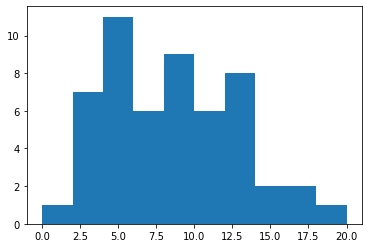

In [14]:
test=[]
for t,e,de in zip(BInf.types,BInf.EW_obs,BInf.dEW):
    if t=="LAE":
        test.append(e/de)
plt.hist(test,bins=10,range=[0,20])
plt.show()

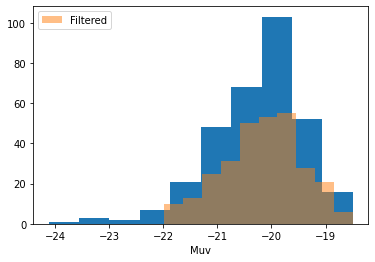

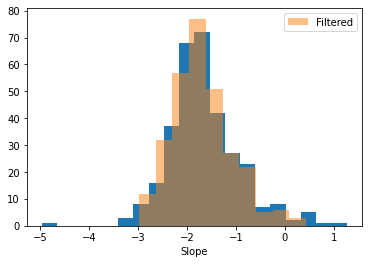

In [15]:
plt.hist(Muv)
plt.hist(BInf.Muv,alpha=0.5,label="Filtered")
plt.xlabel("Muv")
plt.legend()
plt.show()

plt.hist(slopes,bins=20)
plt.hist(BInf.UVslope,alpha=0.5,label="Filtered")
plt.xlabel("Slope")
plt.legend()
plt.show()

In [16]:
attributes = dir(BInf)
parameters = [attr for attr in attributes if not callable(getattr(BInf, attr)) and not attr.startswith("__")]
for i in parameters:
    try:
        print(i,len(getattr(BInf, i)))
    except:
        print(i,"couldnt")


EW couldnt
EW_obs 292
FWHM 292
Lum 292
Muv 292
SNcut couldnt
Skew 292
UV couldnt
UVslope 292
dEW 292
dMuv 292
dSlp 292
dUV couldnt
noise couldnt
orisize 292
priorMuv 3
priorSlope 3
types 292
wtab 292
zs 292


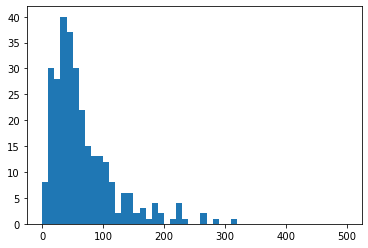

In [17]:
plt.hist(BInf.EW_obs,range=[0,500],bins=50)
plt.show()

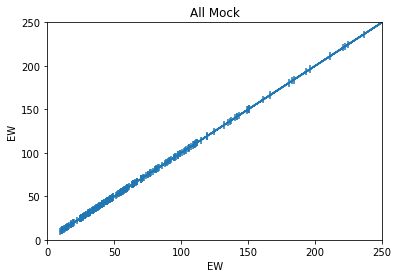

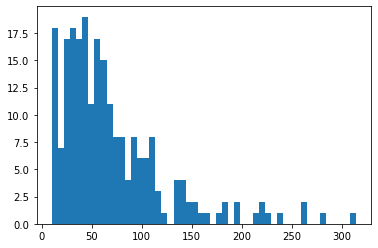

In [18]:
mask=np.array(BInf.types)=="nonLAE"

plt.errorbar(BInf.EW_obs[mask],BInf.EW_obs[mask],yerr=BInf.dEW[mask])
plt.xlim(0,250)
plt.ylim(0,250)
plt.xlabel("EW")
plt.ylabel("EW")
plt.title("All Mock")
plt.show()


plt.hist(BInf.EW_obs[mask],bins=50)
plt.show()

## Run Real Data

In [20]:
import emcee
%load_ext autoreload
%autoreload


def log_prior(theta,BInf,physParams=[BInf.Muv,BInf.UVslope]):
    # I can put priors here or in the equation in the BInf object 
    Auv,Aslp,Ac,Wuv,Wslp,Wc= theta
    A =   BInf.ParameterModel(physParams,[Auv,Aslp,Ac])
    W =   BInf.ParameterModel(physParams,[Wuv,Wslp,Wc])
    #print(A,W)
    if (A >= 0.).all() and (A <=1.0).all() and (W > 0.).all():# and (W < 500.).all():
        return 0.0 

    return -np.inf


def log_likelihood(theta,y,yerr,BInf,physParams=[BInf.Muv,BInf.UVslope]):
    Auv,Aslp,Ac,Wuv,Wslp,Wc = theta
    model = BInf.Posterior(y,yerr,physParams,[Auv,Aslp,Ac],[Wuv,Wslp,Wc]) # Does thus have to be exp, so it gets outside the logaritm?

    return np.nansum(np.log(model))

    

def log_probability(theta, y, yerr,BInf):
    #DrawnMuv=np.array([np.random.normal(loc=x,scale=dx) for x,dx in zip(BInf.Muv,BInf.dMuv)])
    #DrawnSlp=np.array([np.random.normal(loc=x,scale=dx) for x,dx in zip(BInf.UVslope,BInf.dSlp)])
    DrawnphysParams=[BInf.Muv,BInf.UVslope]
    
    lp = log_prior(theta,BInf,physParams=DrawnphysParams)
    if not np.isfinite(lp):
        return -np.inf
    
    lL=log_likelihood(theta, y, yerr,BInf,physParams=DrawnphysParams)
    if np.isnan(lL)==True:
        return -np.inf
    else:
        return lp + lL


steps=5000
nwalkers=30
#mockParamsA=[0.02,-0.1,1.1]
#mockParamsW=[8,-5,235]

inValues=[0.1,-0.05,1.,5,-3,200]
pos = inValues+ 5e-2 * np.random.randn(nwalkers,len(inValues) )
nwalkers, ndim = np.shape(pos)

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(BInf.EW_obs , BInf.dEW , BInf)
)
sampler.run_mcmc(pos, steps, progress=True)

  0%|          | 0/5000 [00:00<?, ?it/s]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  5%|▍         | 241/5000 [00:31<13:13,  6.00it/s]/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/code/PhotometryRebuild/RealData/BayesianInference.py:177: RuntimeWarning: overflow encountered in exp
  p2 = 0.5 * A / Wo * np.exp(0.5*(dEW_2 - 2*ew*Wo)/Wo**2.)*scipy.special.erfc(X)
/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/code/PhotometryRebuild/RealData/BayesianInference.py:177: RuntimeWarning: invalid value encountered in multiply
  p2 = 0.5 * A / Wo * np.exp(0.5*(dEW_2 - 2*ew*Wo)/Wo**2.)*scipy.special.erfc(X)
  7%|▋         | 336/5000 [00:45<09:29,  8.19it/s]/Users/gonzalo/Desktop/Code/Gonzalo_Binospec/code/PhotometryRebuild/RealData/BayesianInference.py:177: RuntimeWarning: invalid value encountered in double_scalars
  p2 = 0.5 * A / Wo * np.exp(0.5*(dEW_2 - 2*ew*Wo)/Wo**2.)*scipy.special.erfc(X)
100%|██████████| 5000/5000 [11:56<00:00,  6.98it/s]


State([[-1.91021871e-02 -2.10104345e-02  5.15901532e-01  1.09901168e+01
  -4.10194645e-01  2.45510378e+02]
 [-9.90194648e-03  1.94860550e-02  7.71146679e-01  8.94122377e+00
  -7.61569414e-01  2.03468543e+02]
 [ 1.07114474e-01 -2.88042460e-02  9.93330026e-01  4.97785350e+00
  -3.00746758e+00  1.99965237e+02]
 [-1.16030029e-02 -9.91315443e-03  6.95116563e-01  9.49127498e+00
   4.13279935e+00  2.21652484e+02]
 [ 1.57530971e-01 -6.51646171e-02  9.67255174e-01  4.95246348e+00
  -2.98889744e+00  1.99862812e+02]
 [ 1.53958005e-01 -5.54537328e-02  1.03879356e+00  4.97349785e+00
  -3.04999680e+00  1.99965373e+02]
 [ 4.48135139e-02 -6.89403431e-02  1.56309533e+00  1.26413884e+01
   6.31533805e+00  2.95050310e+02]
 [-1.33172020e-02 -1.19547281e-01  2.27853937e-01  1.29819413e+01
   2.25216090e+00  2.96127446e+02]
 [ 1.21447988e-01 -8.12896958e-02  9.03360847e-01  5.00596489e+00
  -3.00449990e+00  1.99979917e+02]
 [ 1.26765647e-01 -1.01290640e-01  1.00744755e+00  4.96153999e+00
  -2.94602118e+00  

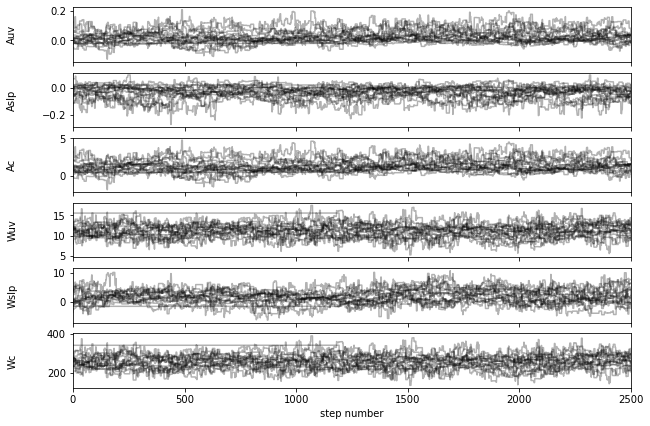

In [24]:


dis=2500
labels = ["Auv", "Aslp","Ac","Wuv","Wslp","Wc"]
fig, axes = plt.subplots(len(labels), figsize=(10, 7), sharex=True)
samples = sampler.get_chain(discard=dis)
logProb=sampler.get_log_prob(discard=dis)
maskWalkers=[False if np.isinf(logProb[steps-dis-10,i]) else True for i in range(0,nwalkers)]
samples=np.array([s[maskWalkers] for s in samples])
for i in range(len(labels)):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number")
plt.show()



(40000, 6)


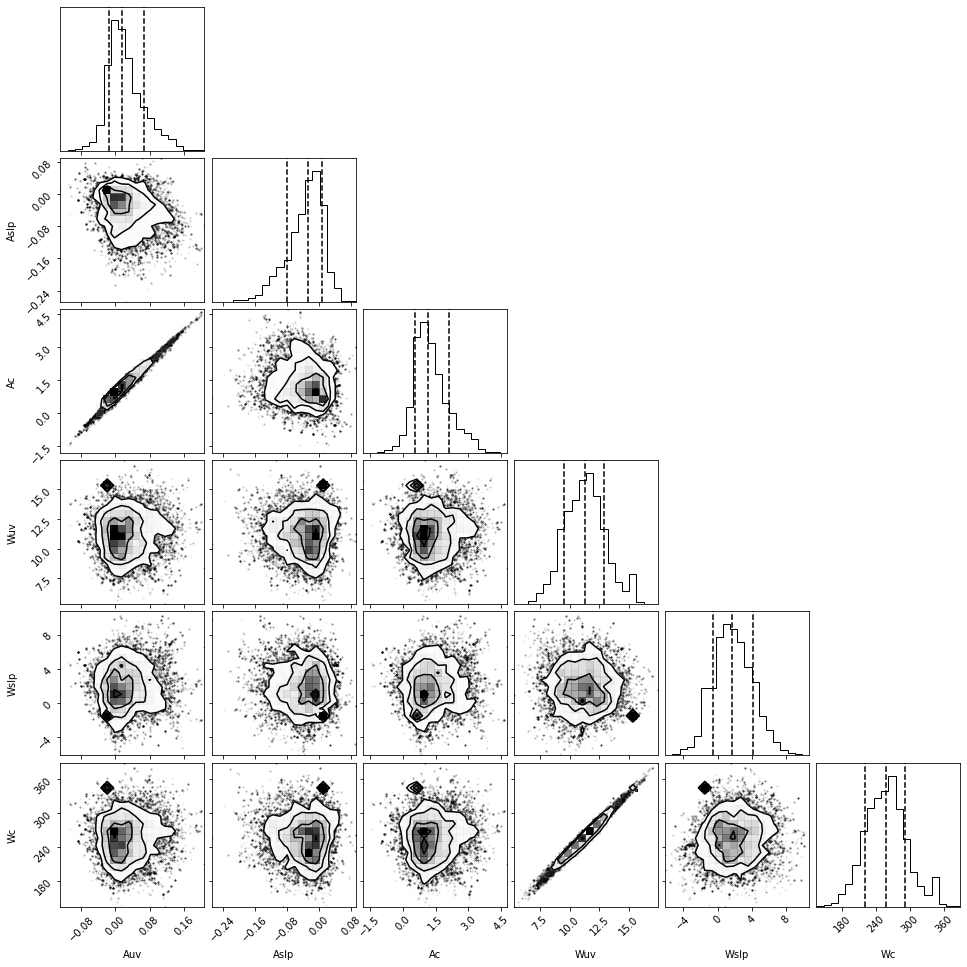

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [25]:
import corner
from IPython.display import display, Math


ndim=len(labels)
samples = sampler.get_chain(discard=dis)
samples=np.array([s[maskWalkers] for s in samples])
samples=samples.reshape(np.shape(samples)[0]*np.shape(samples)[1],np.shape(samples)[2])
print(np.shape(samples))


fig = corner.corner(
    samples, labels=labels,quantiles=[.16,.50,.84]
)
plt.show()

results=[]
for i in range(ndim):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    results.append(mcmc[1])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
RESULTS : 
0.9039001319568075
27.35661204633925


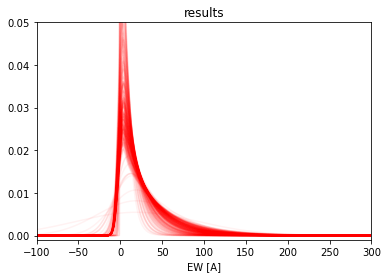

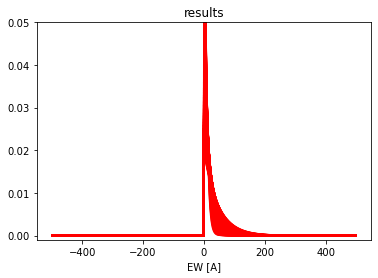

(array([30., 51., 59., 41., 29., 21., 18.,  9.,  9.,  5.,  3.,  5.,  2.,
         1.,  4.,  1.,  2.,  1.,  0.,  1.]),
 array([  1.23538406,  16.90313484,  32.57088561,  48.23863639,
         63.90638716,  79.57413793,  95.24188871, 110.90963948,
        126.57739026, 142.24514103, 157.91289181, 173.58064258,
        189.24839336, 204.91614413, 220.58389491, 236.25164568,
        251.91939646, 267.58714723, 283.254898  , 298.92264878,
        314.59039955]),
 <BarContainer object of 20 artists>)

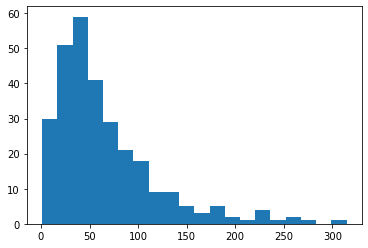

In [26]:
%load_ext autoreload
%autoreload


print("RESULTS : ")
print(results[0]*np.nanmedian(BInf.Muv)+results[1]*np.nanmedian(BInf.UVslope)+results[2])
print(results[3]*np.nanmedian(BInf.Muv) + results[4]*np.nanmedian(BInf.UVslope) +results[5])


mParamsA=results[:3]
mParamsW=results[3:]

x,probSets,As,Ws=BInf.GenerateMockDataConvolved(mParamsA,mParamsW)
for prob in probSets[:]:
    plt.plot(x,prob,color="red",alpha=0.05)
    plt.ylim(-0.001,0.05)
    plt.xlim(-100,300)
    plt.xlabel("EW [A]")
    plt.title("results")

plt.show()


x,probSets,As,Ws=BInf.GenerateMockData(mParamsA,mParamsW)
for prob in probSets[:]:
    plt.plot(x,prob,color="red")
    plt.ylim(-0.001,0.05)
    #plt.xlim(-0.001,20)
    plt.xlabel("EW [A]")
    plt.title("results")
plt.show()

plt.hist(BInf.EW_obs,bins=20)

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous

def Likelihood(ew,dEW=3,A=0.9,Wo=60):
    """
    Likelihood? : Probability of having a certain value of EW given the exponential parameters A and Wo

    Args:
        ew: Equivalent widths (our values?)
        A : Parameter exponential (should depend on our other observables, such as uvslope and muv)
        Wo : Parameter exponential (should depend on our other observables, such as uvslope and muv)
    """
    if Wo<0:
        A=0

    dEW_2 = dEW**2.
    p1 = (1. - A) * np.exp(-0.5 * ew**2./dEW_2) / np.sqrt(2.*np.pi) / dEW
    X  = (dEW_2/Wo - ew) / np.sqrt(2.) / dEW
    p2 = 0.5 * A / Wo * np.exp(0.5*(dEW_2 - 2*ew*Wo)/Wo**2.)*scipy.special.erfc(X)
    p = p1 + p2
    return p

def OriginalLikelihood(ew,A=0.9,Wo=60):
    """
    Likelihood? : Probability of having a certain value of EW given the exponential parameters A and Wo

    Args:
        ew: Equivalent widths (our values?)
        A : Parameter exponential (should depend on our other observables, such as uvslope and muv)
        Wo : Parameter exponential (should depend on our other observables, such as uvslope and muv)
    """

    if Wo<0:
        A=0

    return ((A/Wo)*np.exp(-ew/Wo)*np.heaviside(ew,0.0))

class CustomDistribution(rv_continuous):
    def _pdf(self, x):
        # Replace 'funcion' with your actual PDF function
        return OriginalLikelihood(x,0.9,60)

In [93]:
custom_dist = CustomDistribution(a=0, b=1000, name='custom_dist')
custom_dist._pdf = np.vectorize(OriginalLikelihood)

# Generate random values from the custom distribution
random_values = custom_dist.rvs(size=1000)

In [263]:
import random

def random_sampler(a,w):

    RAND=np.random.uniform(low=0, high=1,size=1)
    
    if RAND[0] <= (1-a):
        return 0.0

    def OriginalLikelihood(ew,A=a,Wo=w):
        """
        Likelihood? : Probability of having a certain value of EW given the exponential parameters A and Wo

        Args:
            ew: Equivalent widths (our values?)
            A : Parameter exponential (should depend on our other observables, such as uvslope and muv)
            Wo : Parameter exponential (should depend on our other observables, such as uvslope and muv)
        """

        if Wo<0:
            A=0

        return ((A/Wo)*np.exp(-ew/Wo)*np.heaviside(ew,0.0))

    class CustomDistribution(rv_continuous):
        def _pdf(self, x):
            # Replace 'funcion' with your actual PDF function
            return OriginalLikelihood(x)

    bmax=1000
    random_values=bmax
    while random_values>=bmax-10:
        custom_dist = CustomDistribution(a=0, b=bmax, name='custom_dist')
        custom_dist._pdf = np.vectorize(OriginalLikelihood)
        random_values = custom_dist.rvs(size=1)
    
    return random_values[0]

In [289]:
wtab=np.linspace(-50,500,1000)
dew=3
A=0.9
W=60

randoms=np.array([random_sampler(A,W) for i in range(0,10000)])

0.9024119665323671


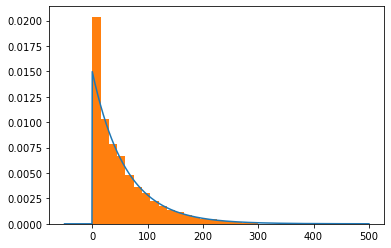

In [290]:
pew=OriginalLikelihood(wtab,A,W)
inte=np.trapz(pew,wtab)
print(inte)

plt.plot(wtab,pew)
plt.hist(randoms,bins=20,range=[0,300],density=True)
plt.show()

In [291]:
RandomsObserved=[np.random.normal(loc=r,scale=dew,size=1)[0] for r in randoms]

0.9997833953667222


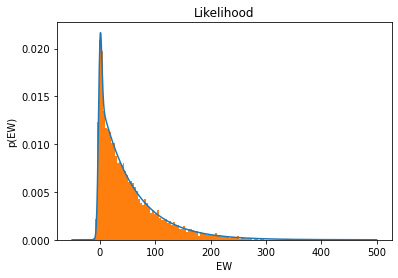

In [293]:
pew=Likelihood(wtab,dew,A,W)
inte=np.trapz(pew,wtab)
print(inte)

plt.plot(wtab,pew)
plt.hist(RandomsObserved,bins=100,range=[-50,300],density=True)
plt.ylabel("p(EW)")
plt.title("Likelihood")
plt.xlabel("EW")
plt.show()

In [284]:
As=[np.random.normal(loc=0.6,scale=0.1,size=1)[0] for r in range(0,10000)]
Ws=[np.random.normal(loc=60,scale=10,size=1)[0] for r in range(0,10000)]

In [285]:
Resultados=[]
for A,W in zip(As,Ws):
    Resultados.append(random_sampler(A,W))
RandomsObserved=[np.random.normal(loc=r,scale=dew,size=1)[0] for r in Resultados]
    

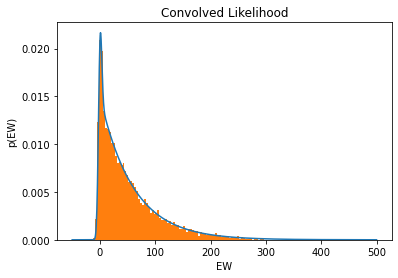

In [294]:
plt.plot(wtab,pew)
plt.hist(RandomsObserved,bins=100,range=[-50,300],density=True)
plt.ylabel("p(EW)")
plt.title("Convolved Likelihood")
plt.xlabel("EW")
plt.show()

In [261]:
Resultados

[0.0,
 130.65970769842988,
 0.0,
 39.5803090880228,
 65.92025155626447,
 41.43198775597085,
 0.0,
 111.27929269632251,
 78.12159393575466,
 43.70470908519401,
 0.0,
 29.08282843898249,
 16.57246016312931,
 1.528066176770338,
 162.36812660628524,
 20.88735393349972,
 74.86647870319992,
 0.0,
 0.0,
 0.0,
 6.788900614087386,
 0.0,
 0.0,
 184.31754696516586,
 0.0,
 0.0,
 19.957396391268016,
 119.30849691304968,
 0.0,
 49.13815477152693,
 280.05333878592313,
 0.0,
 36.22034928901446,
 0.0,
 1.7877025368215067,
 38.93524177234109,
 0.0,
 0.0,
 0.0,
 33.85505415784488,
 0.0,
 139.78067385139047,
 41.07819086121954,
 149.7116212162381,
 0.0,
 0.0,
 2.772729286651341,
 0.0,
 0.0,
 51.39896635276669,
 25.89347102312427,
 12.86969932941267,
 0.0,
 13.720537853041039,
 0.0,
 30.051760006180217,
 139.19906765106538,
 145.43428149998468,
 0.0,
 218.1942684465062,
 1.8839434637753443,
 193.22234977862675,
 278.0364677245609,
 8.471369283862431,
 0.0,
 62.755531447801346,
 147.60775184511652,
 32.9748